In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt

# Load file

In [2]:
# filepath = '../dataset/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf'
filepath = '../dataset/edf/train/02_tcp_le/003/00000302/s001_2003_09_24/00000302_s001_t000.edf'

In [3]:
raw = mne.io.read_raw_edf(filepath)
raw.load_data()

Extracting EDF parameters from /media/windows/Users/Remy/OneDrive/Documents/Polycoco/dataset/edf/train/02_tcp_le/003/00000302/s001_2003_09_24/00000302_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...


<RawEDF | 00000302_s001_t000.edf, 33 x 340000 (1360.0 s), ~85.7 MB, data loaded>

# Explore data

In [4]:
print(raw)

<RawEDF | 00000302_s001_t000.edf, 33 x 340000 (1360.0 s), ~85.7 MB, data loaded>


In [5]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-09-24 14:01:53 UTC
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
>


### Get channels data

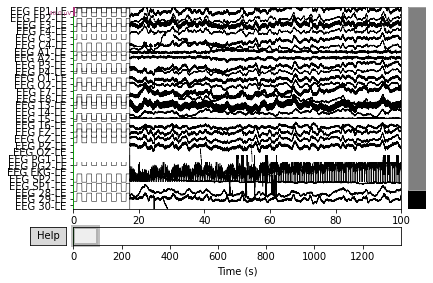

In [6]:
raw.plot(duration=100, n_channels=30);

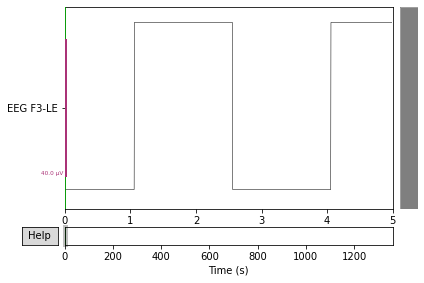

In [7]:
raw.plot(duration=5, order=[2], n_channels=1);

In [8]:
A=raw.get_data()

In [9]:
A.shape

(33, 340000)

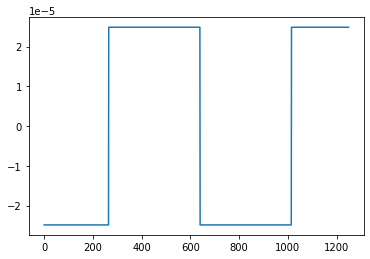

In [10]:
sfreq = int(raw.info['sfreq'])
plt.plot(A[2,:5*sfreq])

In [11]:
raw.annotations

<Annotations | 0 segments>

# Preprocessing

## ICA

In [12]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
# ica.exclude = [1,2]
# ica.plot_properties(raw, picks=ica.exclude)
# ica.plot_properties(raw)

Fitting ICA to data using 33 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 14.2s.


<ICA | raw data decomposition, fit (fastica): 340000 samples, 20 components, channels used: "eeg">

Transforming to ICA space (20 components)
Zeroing out 0 ICA components


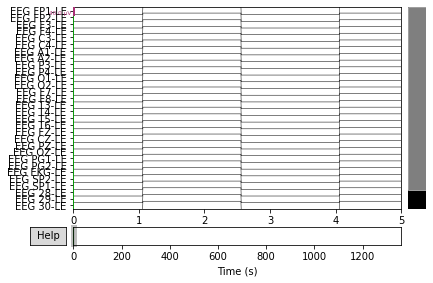

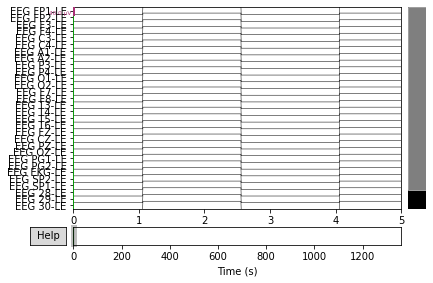

In [13]:
orig_raw = raw.copy()
ica.apply(raw)
orig_raw.plot(duration = 5, n_channels=30)
raw.plot(duration = 5, n_channels=30);